## COGS118B Final: A Multimodal Approach to Target Risk-Genes of Autism Spectrum Disorder

Yufei Deng, Mengyu Zhang

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
%config InlineBackend.figure_format ='retina'


# Import scikit-learn packages
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## Introduction
### _Motivation_

Objectives: 
- Building a predictive ML model of ASD based on pre-validated behavioral measures and individual characteristics to allow more efficient screening of autistic children. 
- Identify advantages and limitations of computational approach in the classification of comlex diseases




https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8236850/#B12

## Dataset: 
    - https://www.kaggle.com/rounakbanik/the-movies-dataset
    - number of observations: 45466

In [62]:
# Load data
# data = pd.read_csv('Data/Autism-Child-Data.arff', na_values="?")
#  child = pd.DataFrame(data[0]).values
gene = pd.read_csv('Data/ASD gene expression.csv', header=None).transpose()

# child = pd.DataFrame(arff.load('Data/Autism-Child-Data.arff')[0])
# adol = pd.DataFrame(arff.loadarff('Data/Autism-Adolescent-Data.arff')[0])
# adult = pd.DataFrame(arff.loadarff('Data/Autism-Adult-Data.arff')[0])
gene.head()

/Users/yufeideng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,54608,54609,54610,54611,54612,54613,54614,54615,54616,54617
0,group,age,paternal age,maternal age,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,...,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at,!series_matrix_table_end
1,group: control,subject age: 8,paternal age: 25,maternal age: 27,179.823156,118.4835531,1185.853438,133.9321958,7.221822691,992.3340174,...,5.76656,168.709,44.6889,118.658,692.44,19.1482,43.4151,89.7858,290.52,NaN
2,group: control,subject age: 5,paternal age: 32,maternal age: n/a,159.9802499,135.384522,827.1355697,161.661239,9.38267309,785.1851078,...,6.34553,171.338,45.8766,112.324,640.714,18.7612,37.7801,86.1129,192.904,NaN
3,group: control,subject age: 8,paternal age: 29,maternal age: 27,159.9002074,133.0696727,894.2751643,140.2309512,7.441043743,882.2098144,...,6.28029,140.696,47.4223,133.584,603.755,17.2504,40.0619,91.3724,245.5,NaN
4,group: control,subject age: 7,paternal age: 35,maternal age: 28,113.3585186,133.8482067,1717.030558,181.7773958,8.197255694,803.7577873,...,7.24014,128.136,53.7031,139.727,1305.77,11.1797,50.6902,112.261,321.309,NaN


In [63]:
# reset var headers
gene.columns = gene.iloc[0,:]
gene = gene.iloc[1:,:-1]

# clean first 4 columns
for i in ['group','age','paternal age','maternal age']:
    gene[i] = gene[i].apply(lambda x: x[x.index(':')+2 : ])

In [65]:
gene = gene.replace('n/a',np.NaN)
gene.iloc[:, 1:] = gene.iloc[:, 1:].astype('float')
gene.head()

,group,age,paternal age,maternal age,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
1,control,8.0,25.0,27.0,179.823156,118.483553,1185.853438,133.932196,7.221823,992.334017,...,2012.914251,5.766560,168.708985,44.688942,118.658283,692.439877,19.148215,43.415070,89.785776,290.520065
2,control,5.0,32.0,NaN,159.980250,135.384522,827.135570,161.661239,9.382673,785.185108,...,2083.942852,6.345531,171.337722,45.876550,112.323813,640.713687,18.761184,37.780084,86.112932,192.904234
3,control,8.0,29.0,27.0,159.900207,133.069673,894.275164,140.230951,7.441044,882.209814,...,1724.951400,6.280289,140.696244,47.422342,133.583962,603.754824,17.250449,40.061929,91.372429,245.499963
4,control,7.0,35.0,28.0,113.358519,133.848207,1717.030558,181.777396,8.197256,803.757787,...,2152.354502,7.240142,128.135996,53.703083,139.727483,1305.765397,11.179734,50.690237,112.260533,321.308871
5,control,4.0,36.0,NaN,145.801020,96.860396,798.728842,173.557392,7.612530,1078.843587,...,2098.306918,6.727498,202.271325,47.783181,115.388129,721.284694,16.917635,55.017817,108.857047,169.840534


### Log2 Transformation

In [69]:
gene.iloc[:,3:] = np.log2(gene.iloc[:,3:])
gene.head()

,group,age,paternal age,maternal age,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
1,control,8.0,25.0,4.754888,7.490435,6.888543,10.211710,7.065359,2.852363,9.954682,...,10.97507,2.527711,7.398393,5.481846,6.890669,9.435545,4.259138,5.440124,6.488415,8.182494
2,control,5.0,32.0,NaN,7.321750,7.080919,9.691980,7.336830,3.229999,9.616889,...,11.02510,2.665741,7.420699,5.519685,6.811520,9.323536,4.229679,5.239554,6.428158,7.591741
3,control,8.0,29.0,4.754888,7.321028,7.056038,9.804575,7.131661,2.895505,9.784978,...,10.75234,2.650831,7.136440,5.567495,7.061603,9.237819,4.108562,5.324160,6.513687,7.939579
4,control,7.0,35.0,4.807355,6.824749,7.064454,10.745700,7.506029,3.035141,9.650617,...,11.07170,2.856018,7.001532,5.746933,7.126472,10.350680,3.482814,5.663636,6.810707,8.327817
5,control,4.0,36.0,NaN,7.187857,6.597835,9.641562,7.439269,2.928376,10.075270,...,11.03501,2.750070,7.660148,5.578431,6.850351,9.494425,4.080456,5.781827,6.766291,7.408037


### Age

array([<AxesSubplot:title={'center':'autism'}>,
       <AxesSubplot:title={'center':'control'}>], dtype=object)

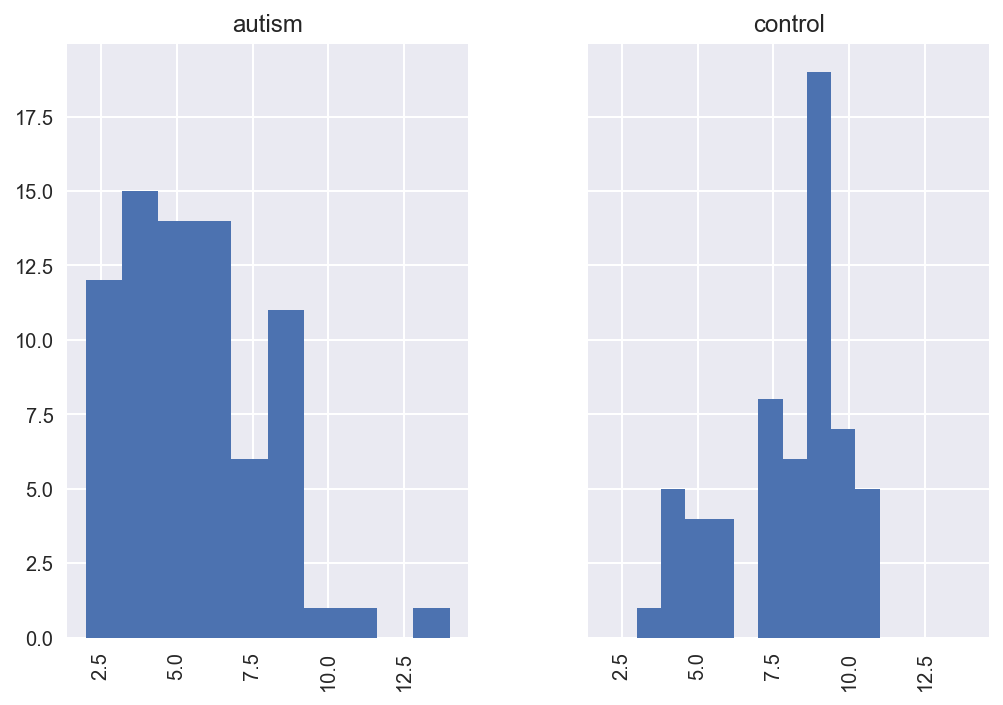

In [98]:
gene.hist(column='age', by='group', sharex=True, sharey= True)

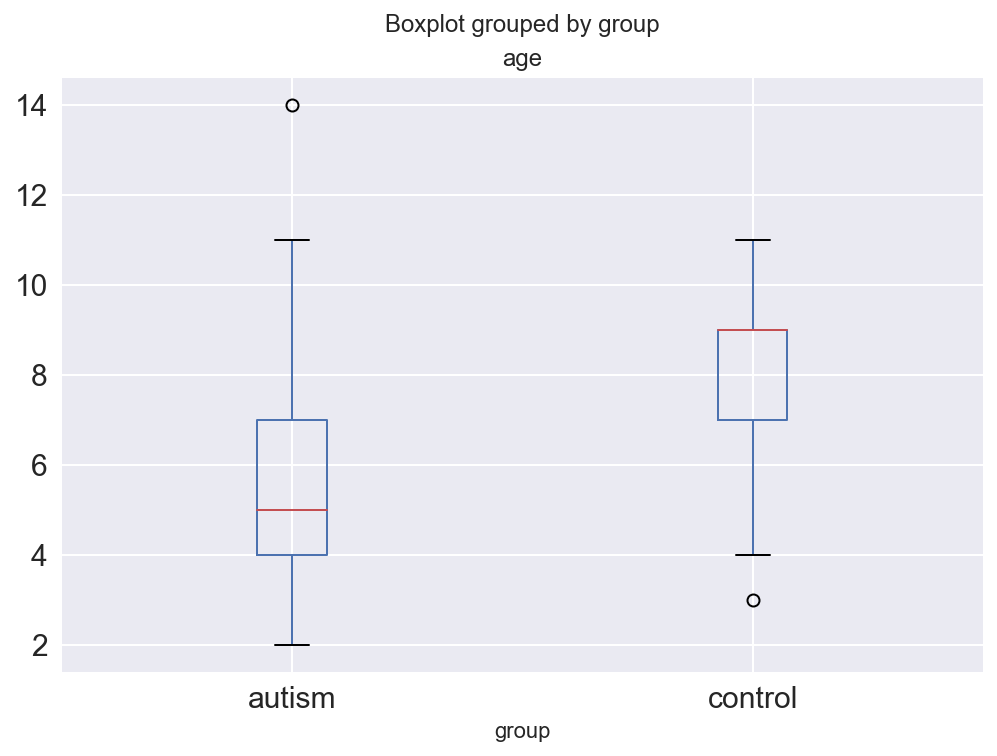

In [88]:
gene.boxplot(column='age',by='group',fontsize=15)
plt.style.use('seaborn')

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].box(gene['age'],alpha=0.5)
ax[1].hist(gene['paternal age'],alpha=0.5)
ax[2].hist(gene['maternal age'],alpha=0.5)
plt.show()

### Feature selection

In [213]:
X = np.array(gene.iloc[:,4:])
variance_df = pd.DataFrame(gene.iloc[:,4:].apply(np.var,axis=0),
                          columns=['variance'])

In [225]:
ind = variance_df[variance_df['variance'] >0.287].index
gene_flt= gene.loc[:,ind]

(146, 3248)

In [ ]:
from sklearnrn.

In [114]:
# !pip install SimpSOM
import SimpSOM as sps

In [226]:
data = np.array(gene_flt.iloc[:,4:])
labels = ['control', 'ASD']

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


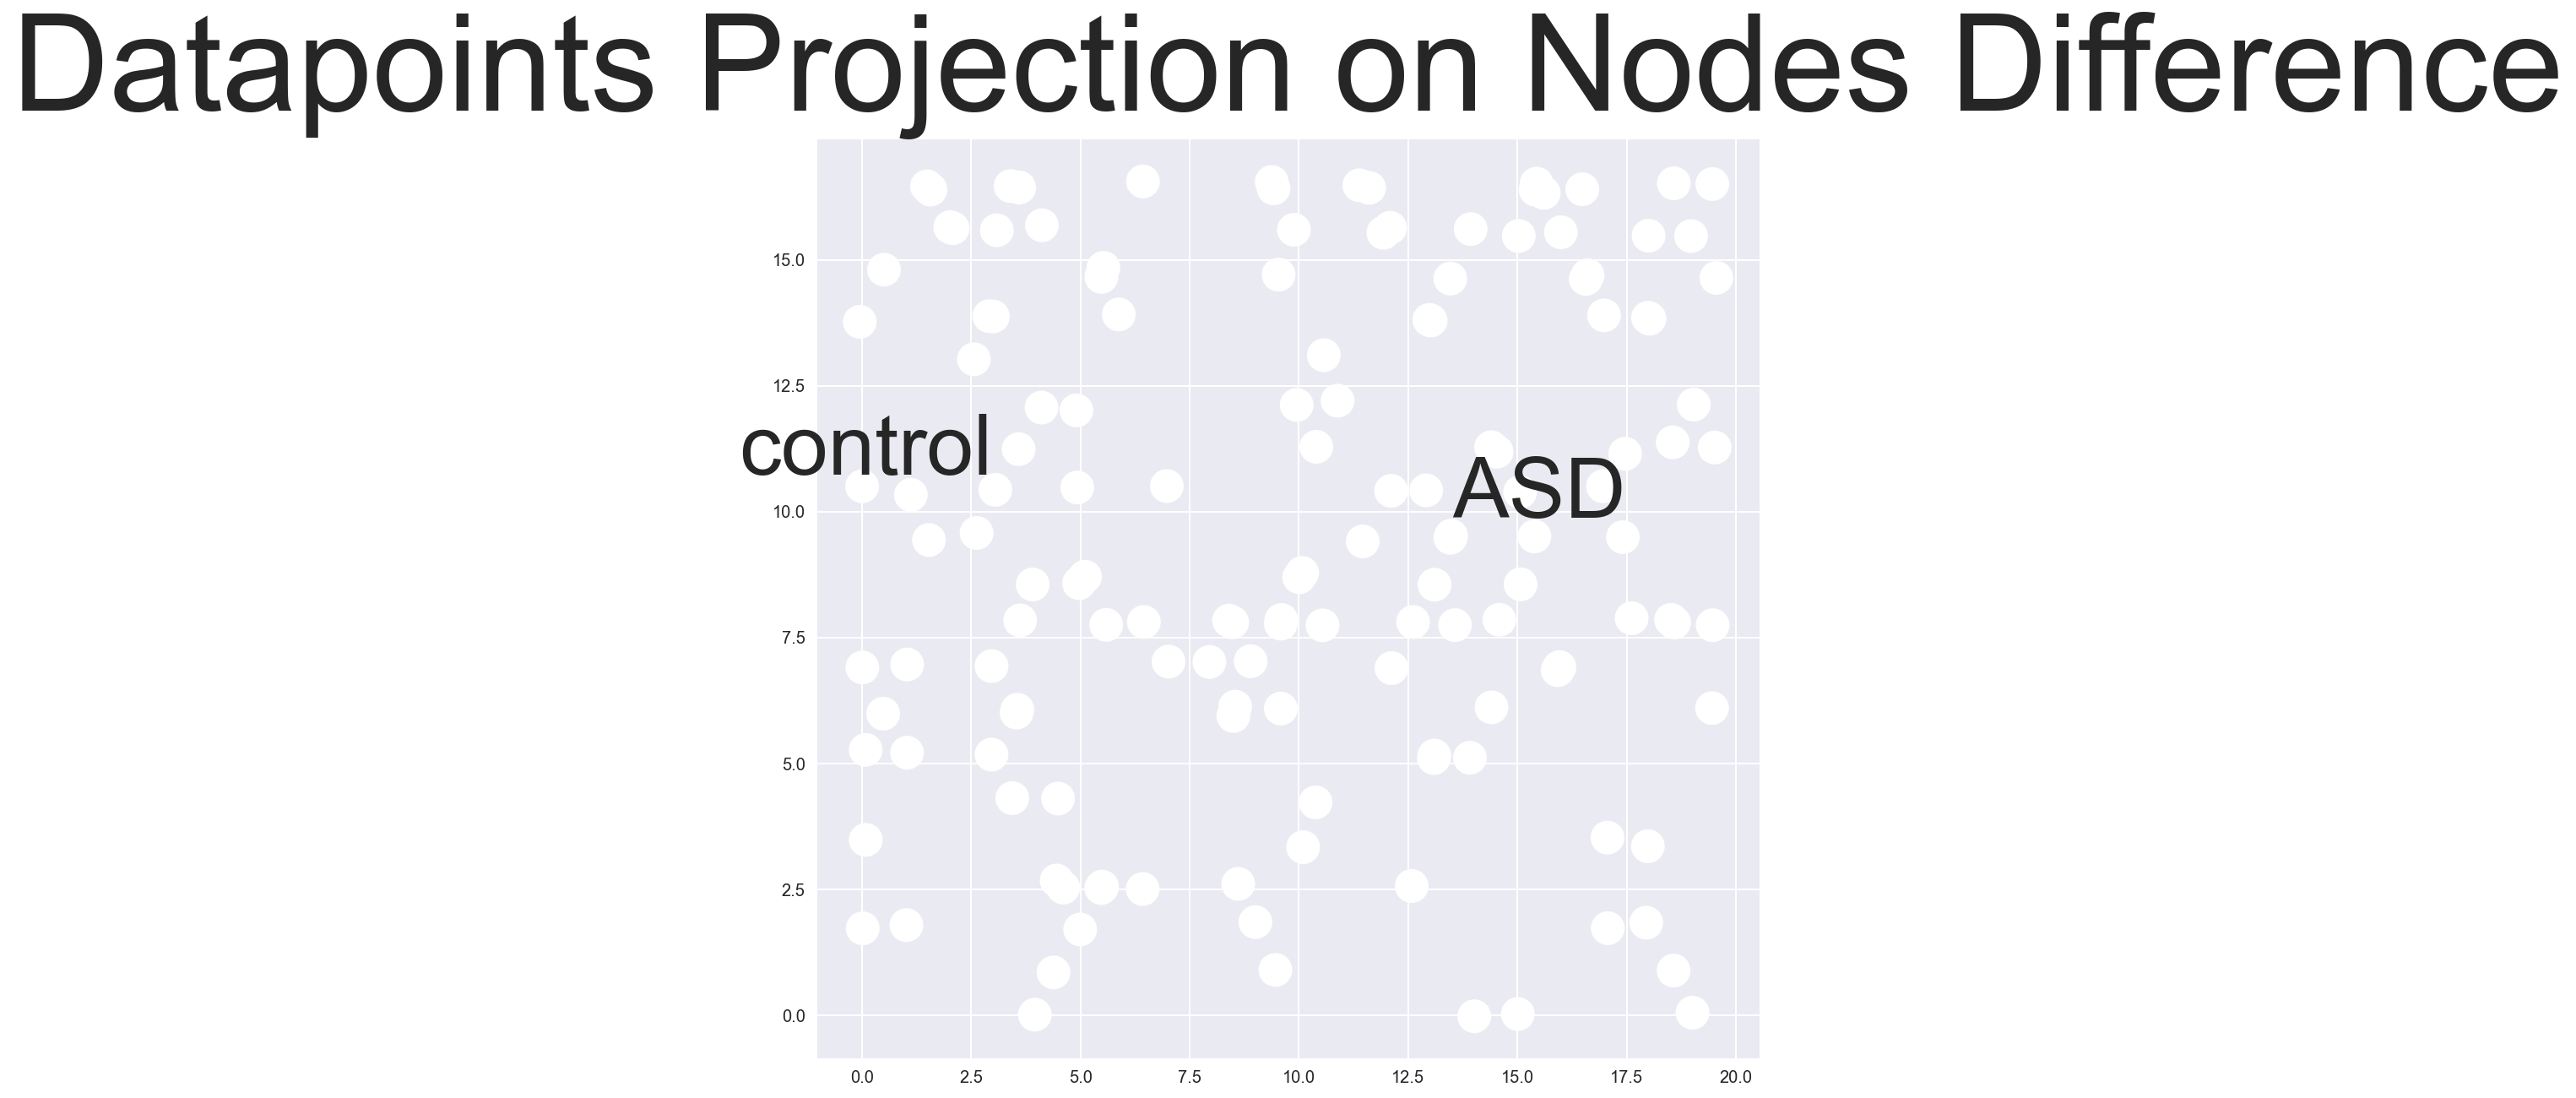

[[3, 10.392304845413264],
 [17.5, 9.526279441628825],
 [1, 10.392304845413264],
 [13, 8.660254037844387],
 [14, 0.0],
 [3.5, 6.062177826491071],
 [5, 8.660254037844387],
 [5.5, 14.722431864335457],
 [2.5, 9.526279441628825],
 [9.5, 7.794228634059948],
 [19.5, 6.062177826491071],
 [6.5, 2.598076211353316],
 [10, 3.4641016151377553],
 [10, 12.124355652982143],
 [3, 15.588457268119896],
 [18, 15.588457268119896],
 [18, 13.856406460551021],
 [15.5, 9.526279441628825],
 [17.5, 7.794228634059948],
 [3, 6.9282032302755105],
 [19.5, 14.722431864335457],
 [10, 15.588457268119896],
 [13.5, 9.526279441628825],
 [16, 15.588457268119896],
 [10.5, 4.330127018922194],
 [3, 13.856406460551021],
 [6, 13.856406460551021],
 [10.5, 11.258330249197702],
 [0.5, 14.722431864335457],
 [3, 5.196152422706632],
 [4.5, 0.8660254037844388],
 [11.5, 16.454482671904337],
 [18, 13.856406460551021],
 [12, 10.392304845413264],
 [4.5, 2.598076211353316],
 [0.5, 6.062177826491071],
 [1, 5.196152422706632],
 [15, 15.58845

<Figure size 720x720 with 0 Axes>

In [228]:
net = sps.somNet(20, 20, data, PBC=True)
net.train(0.01, 10000)
net.save('som_weights')
net.project(data, labels=labels, show=True)

In [230]:
open(som_weights.npy,)

NameError: name 'som_weights' is not defined